# House Pricing Prediction

## Project Overview

This project is part of the Kaggle competition “House Prices: Advanced Regression Techniques.
The goal is to predict housing sale prices based on property attributes such as living area, location, quality, and year.
Through data preprocessing, feature engineering, and machine learning, this notebook demonstrates how data-driven approaches can be applied to property valuation and price forecasting.

## Loading the Dataset

In [3]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

## Exploratory Data Analysis

This is to understand the variable type(numerical of categorical). To identify the missing values and outliers. To also gain insight on key price drivers.

In [4]:
train.head()
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Visualizing Sale Price Distribution

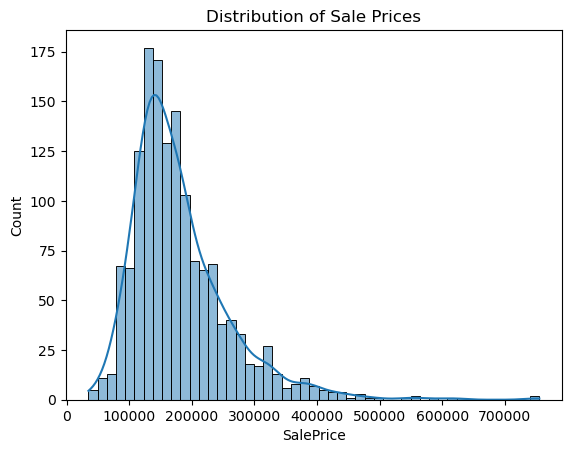

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(train['SalePrice'], kde=True)
plt.title("Distribution of Sale Prices")
plt.show()

The distribution is right-skewed, suggesting a log transformation could stabilize variance and improve model performance.

In [6]:
import numpy as np
y=np.log1p(train["SalePrice"])
train=train.drop("SalePrice", axis=1)

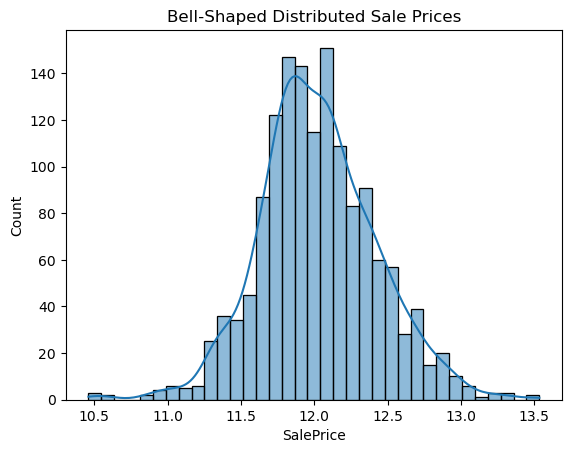

In [7]:
sns.histplot(y, kde=True)
plt.title("Bell-Shaped Distributed Sale Prices")
plt.show()

In [8]:
all_data = pd.concat([train,test],axis=0,ignore_index=True)
# Merging the train and test data for easy cleaning

## Data Cleaning and Preprocessing

After identifying missing columns:
Missing numeric values were imputed with the median.
For categorical features, mode imputation or "None" was applied where appropriate.

In [9]:
all_data.isnull().sum().sort_values(ascending=False).head(50)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
GarageCars          1
KitchenQual         1
BsmtFinSF1          1
SaleType            1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior2nd         1
Exterior1st         1
GarageArea          1
Electrical          1
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
Id                  0
HalfBath            0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea  

In [10]:
# Columns where "None" is appropriate

none_cols=[
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
    "GarageType", "GarageFinish", "GarageQual", "GarageCond",
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
    "BsmtFinType2", "MasVnrType"
]
for col in none_cols:
    if col in all_data.columns:
        all_data[col]=all_data[col].fillna("None")

In [11]:
# Fill simple numeric features with zero

all_data["MasVnrArea"]=all_data["MasVnrArea"].fillna(0)
all_data["GarageYrBlt"]=all_data["GarageYrBlt"].fillna(0)

In [12]:
# Neighborhood-based median imputation

all_data["LotFrontage"]=all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [13]:
# Categorical mode imputation

cat_cols = all_data.select_dtypes(include=["object"]).columns
for col in cat_cols:
    all_data[col]= all_data[col].fillna(all_data[col].mode()[0])

In [14]:
# Numeric median imputation

num_cols = all_data.select_dtypes(exclude=["object"]).columns
for col in num_cols:
    all_data[col]= all_data[col].fillna(all_data[col].median())

## Encoding Categorical Variables

Applied one-hot encoding to convert categorical features into numerical format required by machine learning models.

In [15]:
all_data=pd.get_dummies(all_data)

### Split features and Target

In [16]:
n_train = len(y)
x = all_data.iloc[:n_train, :].copy()
x_test = all_data.iloc[n_train:, :].copy()

In [17]:
# Remove "Id" column as this won't help in the prediction (not predictive)

if "Id" in x.columns:
    x = x.drop("Id", axis=1)
if "Id" in x_test.columns:
    x_test_nos_id = x_test.drop("Id", axis=1)
else:
    x_test_nos_id = x_test

In [18]:
# Confirm no missing values remain

print("NaNs in x:", x.isnull().sum().sum())
print("Nans in x_test:", x_test_nos_id.isnull().sum().sum())

NaNs in x: 0
Nans in x_test: 0


## Model Training: Random Forest Regressor

Evaluate using 5-fold cross-validation and train the model on the full dataset.

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(random_state=42, n_estimators=500,max_depth=None)
scores = cross_val_score(
    model,x,y, scoring="neg_root_mean_squared_error",cv=5
)
print("CV RMSE:", -scores.mean())
model.fit(x,y)

CV RMSE: 0.1427377425719881


RandomForestRegressor(n_estimators=500, random_state=42)

## Generating Predictions & Submission File

In [20]:
preds_log = model.predict(x_test_nos_id)
final_preds = np.expm1(preds_log)

In [21]:
final_preds.round(0)

array([125242., 154559., 176767., ..., 152841., 112548., 232084.])

In [22]:
submission = pd.DataFrame({
    "Id": x_test["Id"],
    "SalePrice": final_preds
})
submission.to_csv("submission.csv", index=False)

In [23]:
submission.head()

,Id,SalePrice
1460,1461,125241.638636
1461,1462,154559.239458
1462,1463,176767.381059
1463,1464,181762.341401
1464,1465,196586.653751
